In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import skimage.io
import os 


from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn import metrics

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split



import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPooling2D, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from tensorflow.keras.utils import to_categorical
from keras import optimizers
import keras.backend as K

from tensorflow.keras.utils import Sequence

from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout





In [2]:
train_directory = '/Users/KAMAR/Videos/ML/Alzheimer_s Dataset/train/'
test_directory = '/Users/KAMAR/Videos/ML/Alzheimer_s Dataset/test'

In [3]:
train_Mild_Demented_dir = os.path.join(train_directory, 'Mild_Demented')  # directory with our training Demented pictures
train_Moderate_Demented_dir = os.path.join(train_directory, 'Moderate_Demented')# directory with our training NonDemented pictures
train_Non_Demented_dir = os.path.join(train_directory,'Non_Demented')
train_Very_Mild_Demented_dir = os.path.join(train_directory,'Very_Mild_Demented')
test_Mild_Demented_dir = os.path.join(test_directory, 'Mild_Demented')  # directory with our validation Demented pictures
test_Moderate_Demented_dir = os.path.join(test_directory, 'Moderate_Demented')  # directory with our validation NonDemented pictures
test_Non_Demented_dir = os.path.join(test_directory, 'Non_Demented')
test_Very_Mild_Demented_dir = os.path.join(test_directory, 'Very_Mild_Demented')

In [4]:
num_Mild_Demented_tr = len(os.listdir(train_Mild_Demented_dir))
num_Moderate_Demented_tr = len(os.listdir(train_Moderate_Demented_dir))
num_Non_Demented_tr = len(os.listdir(train_Non_Demented_dir))
num_Very_Mild_Demented_tr = len(os.listdir(train_Very_Mild_Demented_dir))

num_Mild_Demented_te = len(os.listdir(test_Mild_Demented_dir))
num_Moderate_Demented_te = len(os.listdir(test_Moderate_Demented_dir))
num_Non_Demented_te = len(os.listdir(test_Non_Demented_dir))
num_Very_Mild_Demented_te = len(os.listdir(test_Very_Mild_Demented_dir))

In [5]:
total_train = num_Mild_Demented_tr + num_Moderate_Demented_tr + num_Non_Demented_tr + num_Very_Mild_Demented_tr
total_test = num_Mild_Demented_te + num_Moderate_Demented_te + num_Non_Demented_te + num_Very_Mild_Demented_te

In [6]:
print('total training Mild Demented images:', num_Mild_Demented_tr)
print('total training Moderte Demented images:', num_Moderate_Demented_tr)
print('total training Non Demented images:', num_Non_Demented_tr)
print('total training Very Mild Demented images:', num_Very_Mild_Demented_tr)

print('total validation Mild Demented images:', num_Mild_Demented_te)
print('total validation Moderate Demented images:', num_Moderate_Demented_te)
print('total validation Non Demented images:', num_Non_Demented_te)
print('total validation Very Mild Demented images:', num_Very_Mild_Demented_te)

print("--")
print("Total training images:", total_train)
print("Total validation images:", total_test)

total training Mild Demented images: 717
total training Moderte Demented images: 52
total training Non Demented images: 2560
total training Very Mild Demented images: 1792
total validation Mild Demented images: 179
total validation Moderate Demented images: 12
total validation Non Demented images: 640
total validation Very Mild Demented images: 448
--
Total training images: 5121
Total validation images: 1279


In [7]:
# re-size all the images to this
image_size= [150,150]
batch_size =128
epochs =10

In [8]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2,
                                  
        rotation_range=10,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

valid_datagen= ImageDataGenerator(rescale = 1./255,
                                  validation_split = 0.2)

test_datagen  = ImageDataGenerator(rescale = 1./255
                                  )

In [9]:
train_dataset = train_datagen.flow_from_directory(batch_size=batch_size, directory=train_directory,
                                                           shuffle=True,subset = 'training',
                                                           target_size=image_size,
                                                            class_mode = 'categorical')





Found 4098 images belonging to 4 classes.


In [10]:
valid_dataset = valid_datagen.flow_from_directory(batch_size=batch_size, directory=train_directory,
                                                           shuffle=True,subset = 'validation',
                                                           target_size=image_size,
                                                            class_mode = 'categorical')

Found 1023 images belonging to 4 classes.


In [11]:
test_dataset = test_datagen.flow_from_directory(directory = test_directory,
                                                  target_size =image_size,
                                                  class_mode = 'categorical',
                                                  batch_size =batch_size)

Found 1279 images belonging to 4 classes.


In [12]:
from keras.applications.vgg16 import VGG16
base_model = VGG16(input_shape=image_size + [3], weights='imagenet', include_top=False)

In [13]:
model=Sequential()
model.add(base_model)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(1024,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1024,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1024,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4,activation='softmax'))

In [14]:
for layer in base_model.layers:
  layer.trainable = False

In [15]:
# view the structure of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 512)         0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 8192)              32768     
_________________________________________________________________
dense (Dense)                (None, 1024)              8389632   
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
activation (Activation)      (None, 1024)              0

In [16]:
def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [17]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
        f1_score,
]

In [18]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 **(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(0.01, 5) # when i run it for 50 epochs

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)

In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam',), loss='categorical_crossentropy',metrics=METRICS)

In [20]:
history = model.fit( train_dataset, epochs=epochs,
                    validation_data=valid_dataset, 
                    verbose=1, callbacks = lr_scheduler)

Epoch 1/10
33/33 [==============================] - 914s 28s/step - loss: 1.9423 - accuracy: 0.7157 - precision: 0.4213 - recall: 0.3673 - auc: 0.7164 - f1_score: 0.3939 - val_loss: 2.4676 - val_accuracy: 0.6249 - val_precision: 0.1156 - val_recall: 0.0753 - val_auc: 0.3830 - val_f1_score: 0.0903
Epoch 2/10
33/33 [==============================] - 993s 30s/step - loss: 1.2489 - accuracy: 0.7446 - precision: 0.4858 - recall: 0.3721 - auc: 0.7521 - f1_score: 0.4077 - val_loss: 1.0570 - val_accuracy: 0.7627 - val_precision: 0.5588 - val_recall: 0.2414 - val_auc: 0.7777 - val_f1_score: 0.3359
Epoch 3/10
33/33 [==============================] - 870s 26s/step - loss: 1.1791 - accuracy: 0.7554 - precision: 0.5145 - recall: 0.3812 - auc: 0.7741 - f1_score: 0.4389 - val_loss: 1.0842 - val_accuracy: 0.7835 - val_precision: 0.6877 - val_recall: 0.2454 - val_auc: 0.7350 - val_f1_score: 0.3614
Epoch 4/10
33/33 [==============================] - 870s 26s/step - loss: 1.0984 - accuracy: 0.7631 - prec

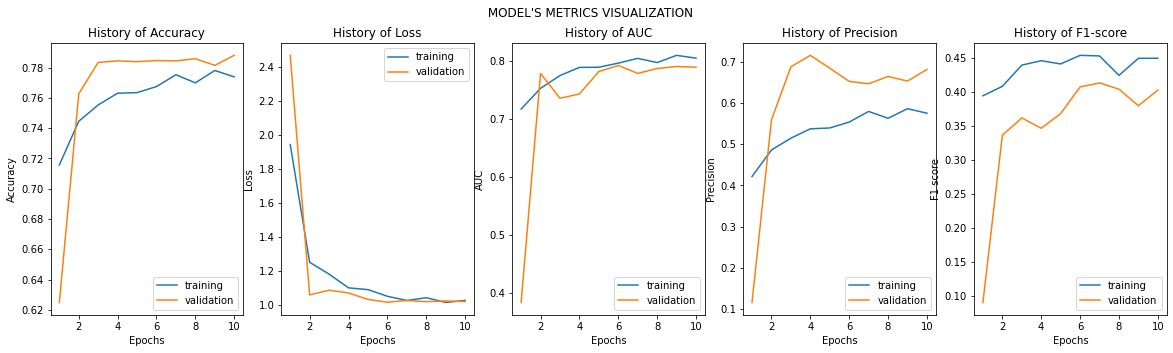

In [21]:
#%% PLOTTING RESULTS (Train vs Validation FOLDER 1)

def Train_Val_Plot(acc,val_acc,loss,val_loss,auc,val_auc,precision,val_precision,f1,val_f1):
    
    fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize= (20,5))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])
    
    ax3.plot(range(1, len(auc) + 1), auc)
    ax3.plot(range(1, len(val_auc) + 1), val_auc)
    ax3.set_title('History of AUC')
    ax3.set_xlabel('Epochs')
    ax3.set_ylabel('AUC')
    ax3.legend(['training', 'validation'])
    
    ax4.plot(range(1, len(precision) + 1), precision)
    ax4.plot(range(1, len(val_precision) + 1), val_precision)
    ax4.set_title('History of Precision')
    ax4.set_xlabel('Epochs')
    ax4.set_ylabel('Precision')
    ax4.legend(['training', 'validation'])
    
    ax5.plot(range(1, len(f1) + 1), f1)
    ax5.plot(range(1, len(val_f1) + 1), val_f1)
    ax5.set_title('History of F1-score')
    ax5.set_xlabel('Epochs')
    ax5.set_ylabel('F1 score')
    ax5.legend(['training', 'validation'])


    plt.show()
    

Train_Val_Plot(history.history['accuracy'],history.history['val_accuracy'],
               history.history['loss'],history.history['val_loss'],
               history.history['auc'],history.history['val_auc'],
               history.history['precision'],history.history['val_precision'],
               history.history['f1_score'],history.history['val_f1_score']
              )

In [22]:
scores = model.evaluate(test_dataset)

10/10 [==============================] - 205s 21s/step - loss: 1.0213 - accuracy: 0.7740 - precision: 0.5708 - recall: 0.3878 - auc: 0.8122 - f1_score: 0.4617


In [23]:
print("Accuracy = ", scores[1])
print("Precision = ", scores[2])
print("Recall = ", scores[3])
print("AUC = ", scores[4])
print("F1_score = ", scores[5])

Accuracy =  0.7740422487258911
Precision =  0.5707709789276123
Recall =  0.38780295848846436
AUC =  0.8121750950813293
F1_score =  0.46172255277633667


In [24]:
from keras.models import model_from_json
model_json = model.to_json()
with open('model.json','w') as json_file:
    json_file.write(model_json)
model.save_weights('modelvgg16.h5')